# Automating browser actions
Sometimes you can't scrape all the data without interacting with the web page.

## Paging
Take a look at this web site:

https://books.toscrape.com/

Notice how the data is paged.  

You can only scrape the entire list of books by clicking on the "next" button repeatedly.




## Scrolling
Take a look at this web site:

https://www.reddit.com/r/news/

View the developer console and locate the HTML code for the content of the page (you can select the arrow in Chrome and click on a page element):

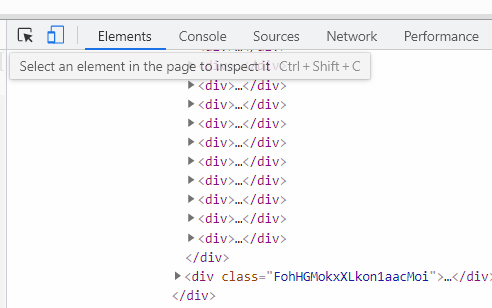

Notice how only a few articles are shown (there are around 30 div elements containing the articles).

Now start scrolling in the browser window.  You will notice new div tags appearing.

You can only scrape the articles lower down in the page by scrolling the page.


## Selenium
Selenium is a browser automation tool.  It can be used to test applications, but is also useful for web scraping as it allows you to simulate browser actions such as clicking buttons, scrolling and entering form data.

Selenium uses Chrome Driver, which effectively gives you a programmable version of Chrome.

Download the latest version of chromedriver: https://chromedriver.chromium.org/

## Paging with Selenium
In this example we will use Selenium to "click" on the next button in the Books to Scrape website.

In [1]:
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from time import sleep
from random import random

In [2]:
# Create the programmable browser
browser = webdriver.Chrome()

WebDriverException: Message: unknown error: no chrome binary at /usr/bin/google-chrome
Stacktrace:
#0 0x56253d818ea3 <unknown>
#1 0x56253d4e4297 <unknown>
#2 0x56253d518e36 <unknown>
#3 0x56253d5172f5 <unknown>
#4 0x56253d567899 <unknown>
#5 0x56253d55bfe3 <unknown>
#6 0x56253d5245a3 <unknown>
#7 0x56253d52596e <unknown>
#8 0x56253d7e084d <unknown>
#9 0x56253d7e4774 <unknown>
#10 0x56253d7cfcc2 <unknown>
#11 0x56253d7e5235 <unknown>
#12 0x56253d7b64de <unknown>
#13 0x56253d8070d8 <unknown>
#14 0x56253d8072e1 <unknown>
#15 0x56253d817fe5 <unknown>
#16 0x7feeded67ac3 <unknown>


In [ ]:
# Extract the books, page by page
currentPage = 1
maxPages = 5
done = False
url = "https://books.toscrape.com/"

while currentPage <= maxPages:
    # Add a random wait time so we don't overload the website and we don't look like a bot
    sleep(random()*3)
    
    # Load the page
    print("Loading", url)
    browser.get(url)

    # Find the location of the list of books
    books = browser.find_element(By.TAG_NAME, "ol").find_elements(By.TAG_NAME, "li")
    
    # Extract all the books
    for book in books:
        title = book.find_element(By.TAG_NAME, "h3").find_element(By.TAG_NAME, "a").get_attribute("title")
        print("\t", title)
    
    # "Click" the next button
    nextButton = browser.find_element(By.CLASS_NAME, "next")
    currentPage += 1
    url = nextButton.find_element(By.TAG_NAME, "a").get_attribute("href")



## Scrolling with Selenium

In [ ]:
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from time import sleep
from random import random

In [ ]:
# Create the programmable browser
browser = webdriver.Chrome(executable_path="C:\\Users\\llewe\\Desktop\\tidy\\chromedriver")

In [ ]:
# Extract the articles by scrolling
currentPage = 1
maxPages = 10
done = False
url = "https://www.reddit.com/r/news/"

# Load the page
print("Loading", url)
browser.get(url)
    
while currentPage <= maxPages:
    print("Page", currentPage)
    
    # Add a random wait time so we don't overload the website and we don't look like a bot
    sleep(random()*3)
    
    # Scroll down the height of the page
    browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")

    currentPage += 1

    
# Now we have all the pages, extrac the titles
articles = browser.find_elements(By.TAG_NAME, "h3")
for article in articles:
    print(article.get_attribute("innerHTML"))

  